# Food Containers Classification 

## Preliminary Set Up

### Google Disk connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from pathlib import Path
path = Path("/content/drive/My Drive/")
dest = path/"food containers"
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
% cd '/content/drive/My Drive/food containers'

/content/drive/My Drive/food containers


### Unzip data

In [ ]:
! ls

data  data.xlsx  IMG  img.tar.gz


In [ ]:
import tarfile

In [ ]:
file = tarfile.open('img.tar.gz')
file.extractall('/content/drive/My Drive/food containers/IMG')
file.close()

In [ ]:
! ls

data  data.xlsx  IMG  img.tar.gz


## Dataset preliminary preparation

### Reading data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('data.xlsx',
                   dtype = {
    "file_name": "object",
    "container": "category",}
    ,header=0)

In [ ]:
df.describe()

file_name container
count                                                1975      1975
unique                                               1975         3
top     18_4514603367515_1694923-e76724a8-d8b6-4803-9f...    bottle
freq                                                    1       749

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   file_name  1975 non-null   object  
 1   container  1975 non-null   category
dtypes: category(1), object(1)
memory usage: 17.5+ KB


In [ ]:
df.head(10)

file_name container
0  18_4514603367515_1694923-e76724a8-d8b6-4803-9f...    bottle
1  779_4514603367515_1190777-47bc675b-8f1b-4ad4-8...    bottle
2                       1027_4514603367515_91629.png    bottle
3  1103_4514603367515_1125434-cf538b18-c542-4e39-...    bottle
4                        515_4514603378313_51825.png    bottle
5                      58_4514603345414_65845964.jpg    bottle
6                        512_4514603244915_22453.png    bottle
7                        675_4514603347210_90749.png    bottle
8                      57_4514603351514_29714072.jpg    bottle
9                      150_4514603367218_6869285.jpg    bottle

In [ ]:
n_by_group = df.groupby("container")["file_name"].count()
n_by_group / len(df.index)

container
bottle    0.379241
glass     0.286076
packet    0.334684
Name: file_name, dtype: float64

### Processed images to train/test dataframes

In [ ]:
df_train= df.sample(frac=0.9, random_state=25)
df_train.head(10)

file_name container
749                      1586_4971666411775_6073913.jpg     glass
1963  126_8693029611184_215124-a11dc38a-9056-4d77-be...    packet
247                         103_4901340047143_47967.png    bottle
1427  187_4902105266090_973742-25539d58-ff1c-4818-8e...     glass
521                         585_4902201407625_84473.png    packet
1956  1201_8801043150606_1323025-8c7f5aa1-9df6-46b9-...    packet
810                         160_4514062957388_40256.png    packet
1530  16_4902388026688_245319-c8da7676-227f-44c6-91a...    packet
631   1783_4909411006303_2267827-05521c0e-4027-4499-...    bottle
85    144_4543995001301_572435-23886b2b-243f-4201-ab...    bottle

In [ ]:
n_by_group_train = df_train.groupby("container")["file_name"].count()
n_by_group_train / len(df_train.index)

container
bottle    0.377953
glass     0.284589
packet    0.337458
Name: file_name, dtype: float64

In [ ]:
df_train.shape

(1778, 2)

In [ ]:
df_test = df.drop(df_train.index)

In [ ]:
df_test

file_name container
14                         1437_4514603326017_52075.png    bottle
20    532_45210624_1146271-6f0a17ca-441b-40c9-8497-9...    bottle
22                          180_4514603244717_42907.png    bottle
25    788_4514603307818_1424241-b51cd193-67e8-430c-a...    bottle
44                         1881_4514603333718_70963.png    bottle
...                                                 ...       ...
1924                       1444_4973918165238_86681.png    packet
1958                         63_8801043024174_61805.png     glass
1959                         11_8801043043809_37566.png     glass
1966                        184_4548514139749_24170.png    bottle
1967  17_4548514153844_163687-e7363631-9696-42ce-b34...    bottle

[197 rows x 2 columns]

In [ ]:
n_by_group_test = df_test.groupby("container")["file_name"].count()
n_by_group_test/ len(df_test.index)

container
bottle    0.390863
glass     0.299492
packet    0.309645
Name: file_name, dtype: float64

In [ ]:
df_test.shape

(197, 2)

### Creating images structure

In [ ]:
import shutil
import os

In [ ]:
img_path = Path('/content/drive/MyDrive/food containers/IMG')

In [ ]:
test_path = ('/content/drive/MyDrive/food containers/data/test')
Path(test_path).mkdir(parents=True, exist_ok=True)

train_path = ('/content/drive/MyDrive/food containers/data/train')
Path(train_path).mkdir(parents=True, exist_ok=True)

In [ ]:
test_file_names = list(df_test['file_name'])
train_file_names = list(df_train['file_name'])

In [ ]:
for file in  test_file_names:
  shutil.move(os.path.join(img_path, file), os.path.join(test_path, file))

In [ ]:
for file in  train_file_names:
  shutil.move(os.path.join(img_path, file), os.path.join(train_path, file))

### Images examples

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image

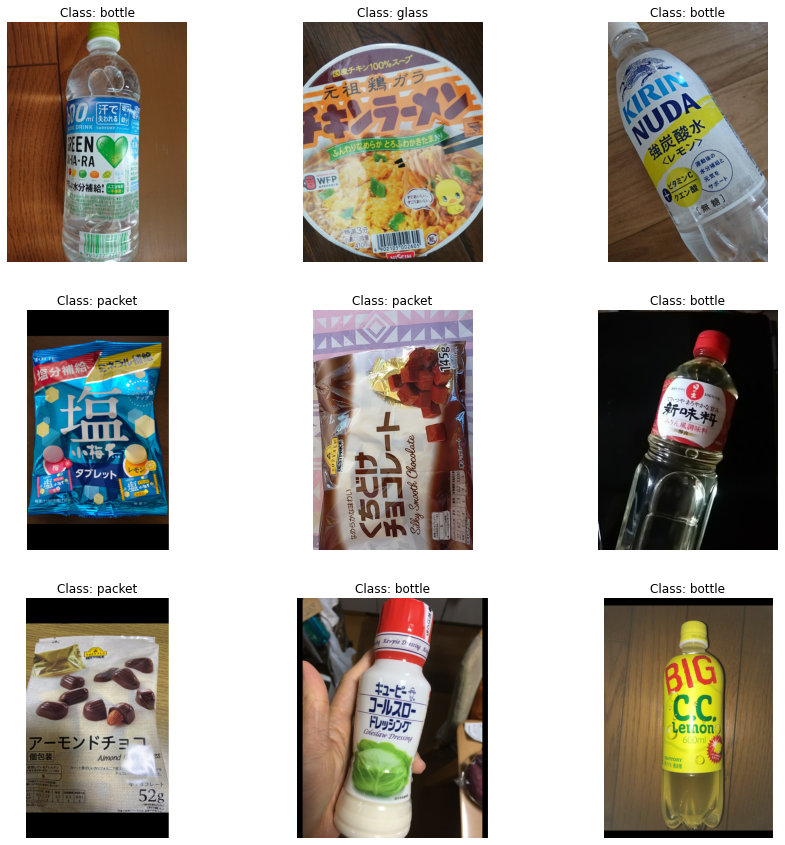

In [ ]:
plt.figure(figsize=(15,15))

random_image = df_train.sample(n=9)
random_image_paths = random_image['file_name'].values
random_image_categ = random_image['container'].values

for index, path in enumerate(random_image_paths):
    im = Image.open(f'/content/drive/My Drive/food containers/data//train/{path}')
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('Class: '+str(random_image_categ[index]))
    plt.axis('off')
    
plt.show()

## Loading data from test and train folders

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

test_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [ ]:
EPOCHS               = 1
# EPOCHS               = 8
BATCH_SIZE           = 16
LR                   = 0.0001

CLASS_NUM            = 3
IMG_SIZE             = 150
IMG_CHANNELS         = 3
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)
RANDOM_SEED = 42

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                        directory= train_path,
                                        x_col="file_name",
                                        y_col='container',
                                        seed=RANDOM_SEED,
                                        class_mode='categorical',
                                        target_size=(150, 150),
                                        batch_size = BATCH_SIZE,
                                        color_mode="rgb",
                                        shuffle=True,
                                        subset='training'
                                        ) 

test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                        directory= test_path,
                                        x_col="file_name",
                                        y_col='container',
                                        seed=RANDOM_SEED,
                                        class_mode='categorical',
                                        target_size=(150, 150),
                                        batch_size = BATCH_SIZE,
                                        color_mode="rgb",
                                        shuffle=False,
                                        ) 

Found 1778 validated image filenames belonging to 3 classes.
Found 197 validated image filenames belonging to 3 classes.


## Defining InceptionV3 CNN Model Layers

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
import IPython 
% cd '/content/drive/My Drive/food containers/data'
keras.utils.plot_model(pre_trained_model, to_file='keras_plot_model.png', show_shapes=True)
IPython.display.Image("keras_plot_model.png")

/content/drive/My Drive/food containers/data


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [ ]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      ]

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                              

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=3,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/3
111/111 [==============================] - 641s 6s/step - loss: 1.5478 - accuracy: 0.7989
Epoch 2/3
111/111 [==============================] - 110s 986ms/step - loss: 0.4878 - accuracy: 0.8719
Epoch 3/3
111/111 [==============================] - 110s 984ms/step - loss: 0.4170 - accuracy: 0.8924


### Further Improving Accuracy with Fine-Tuning

In [ ]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/food containers/data/best_model.hdf5'
early_stopping = EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = ['acc'] , 
    verbose = 1  ,
    mode = 'max')
callbacks_list = [early_stopping,checkpoint]

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=20,
      callbacks = callbacks_list,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
111/111 [==============================] - ETA: 0s - loss: 0.4718 - acc: 0.8190WARNING:tensorflow:Early stopping conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc

Epoch 1: saving model to /content/drive/MyDrive/food containers/data/best_model.hdf5
111/111 [==============================] - 141s 1s/step - loss: 0.4718 - acc: 0.8190
Epoch 2/20
111/111 [==============================] - ETA: 0s - loss: 0.4536 - acc: 0.8354WARNING:tensorflow:Early stopping conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc

Epoch 2: saving model to /content/drive/MyDrive/food containers/data/best_model.hdf5
111/111 [==============================] - 142s 1s/step - loss: 0.4536 - acc: 0.8354
Epoch 3/20
111/111 [==============================] - ETA: 0s - loss: 0.4439 - acc: 0.8326WARNING:tensorflow:Early stopping conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc

Epoch 3: saving mo

### Save and load model functions

In [ ]:
# model.save('./content/drive/MyDrive/food containers/data/model_last.hdf5')

In [ ]:
# model.load_weights('./content/drive/MyDrive/food containers/data/best_model.hdf5')

In [ ]:
# model.load_model('/content/drive/My Drive/food containers/data/model_last.h5')

### Evaluate the model

In [ ]:
import numpy as np

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
results = model.evaluate_generator(
                     generator = test_generator,
                     steps = STEP_SIZE_TEST
                     )

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," = ",results[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


loss  =  0.4265252649784088
acc  =  0.8072916865348816


### Predict the output

In [ ]:
test_generator.reset()
predictions =model.predict_generator(test_generator,
                            steps=len(test_generator),
                            verbose=1)
predictions = np.argmax(predictions, axis=-1) # several categories


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


13/13 [==============================] - 10s 704ms/step


In [ ]:
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions_classes = [label_map[k] for k in predictions]

## Results InceptionV3

### Confusion matrix

In [ ]:
def plot_conf_matrix(cm, 
                    classes,
                    title='Confusion matrix',
                    cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
train_generator.class_indices

{'bottle': 0, 'glass': 1, 'packet': 2}

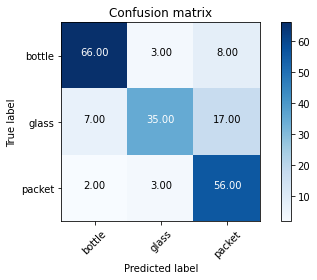

In [ ]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools  

cnf_matrix = confusion_matrix(test_generator.classes, predictions)
np.set_printoptions(precision=2)


plt.figure()
plot_conf_matrix(cnf_matrix, 
                classes=['bottle','glass','packet'],
                title='Confusion matrix')
plt.show()

### Classification_report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_generator.classes, predictions, target_names=['bottle','glass','packet'])
print(report)

              precision    recall  f1-score   support

      bottle       0.88      0.86      0.87        77
       glass       0.85      0.59      0.70        59
      packet       0.69      0.92      0.79        61

    accuracy                           0.80       197
   macro avg       0.81      0.79      0.79       197
weighted avg       0.81      0.80      0.79       197



### Plot a curve of classification metrics vs. epoch

In [ ]:
def plot_curve(hist, list_of_metrics):
  """Plot a curve of classification metrics vs. epoch."""  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(x[1:], label=m)
  plt.legend()

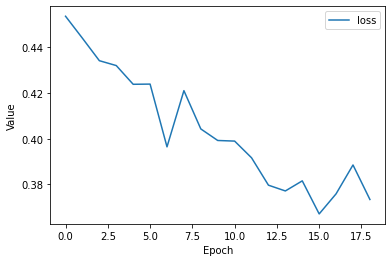

In [ ]:
list_of_metrics_to_plot = ['loss'] 
plot_curve( history.history, list_of_metrics_to_plot)

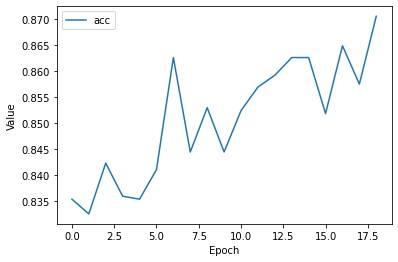

In [ ]:
list_of_metrics_to_plot = ['acc'] 
plot_curve( history.history, list_of_metrics_to_plot)

## Defining Xception CNN Model Layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.xception import Xception

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape =input_shape)

83697664/83683744 [==============================] - 1s 0us/step


### Tuning the model

In [ ]:
from keras.layers import GlobalAveragePooling2D,Dense,Dropout

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

#  Add a fully-connected layer
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)

# # Add a final softmax layer for classification
predictions = Dense(3, activation='softmax')(x)

### Define training metrics

In [ ]:
from keras.models import Model


In [ ]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      ]

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=METRICS)

### Fitting/Training the model

In [ ]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/food containers/data/best_model_Xception.hdf5'
early_stopping = EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = ['acc'] , 
    verbose = 1  ,
    mode = 'max')
callbacks_list = [early_stopping,checkpoint]

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = STEP_SIZE_TRAIN,
        epochs = 1,
        callbacks = callbacks_list
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


111/111 [==============================] - ETA: 0s - loss: 0.8232 - accuracy: 0.7667WARNING:tensorflow:Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy

Epoch 1: saving model to /content/drive/MyDrive/food containers/data/best_model_Xception.hdf5
111/111 [==============================] - 673s 6s/step - loss: 0.8232 - accuracy: 0.7667


### Save and load model functions

In [ ]:
# model.save('./content/drive/MyDrive/food containers/data/model_last.hdf5')

In [ ]:
# model.load_weights('./content/drive/MyDrive/food containers/data/best_model.hdf5')

In [ ]:
# model.load_model('/content/drive/My Drive/food containers/data/model_last.h5')

### Evaluate the model

In [ ]:
import numpy as np

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
results = model.evaluate_generator(
                     generator = test_generator,
                     steps = STEP_SIZE_TEST)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," = ",results[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


loss  =  1.214406132698059
accuracy  =  0.7986111044883728


### Predict the output

In [ ]:
test_generator.reset()
predictions =model.predict_generator(test_generator,
                            steps=len(test_generator),
                            verbose=1)
predictions = np.argmax(predictions, axis=-1) # several  classes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


13/13 [==============================] - 17s 1s/step


In [ ]:
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions_classes = [label_map[k] for k in predictions]

## Results Xception

### Confusion matrix

In [ ]:
def plot_conf_matrix(cm, 
                    classes,
                    title='Confusion matrix',
                    cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
train_generator.class_indices

{'bottle': 0, 'glass': 1, 'packet': 2}

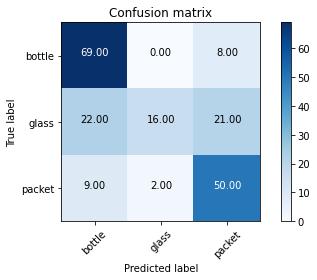

In [ ]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools  

cnf_matrix = confusion_matrix(test_generator.classes, predictions)
np.set_printoptions(precision=2)


plt.figure()
plot_conf_matrix(cnf_matrix, 
                classes=['bottle','glass','packet'],
                title='Confusion matrix')
plt.show()

### Classification_report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_generator.classes, predictions, target_names=['bottle','glass','packet'])
print(report)

              precision    recall  f1-score   support

      bottle       0.69      0.90      0.78        77
       glass       0.89      0.27      0.42        59
      packet       0.63      0.82      0.71        61

    accuracy                           0.69       197
   macro avg       0.74      0.66      0.64       197
weighted avg       0.73      0.69      0.65       197

